In [19]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "../data/mouse_drug_data.csv"
clinical_trial_data_to_load = "../data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_drug_df, clinical_trial_df, on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [20]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response_mean_series = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_response_mean = tumor_response_mean_series.reset_index()

# Preview DataFrame
tumor_response_mean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [21]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_response_standard_error_series = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_response_standard_error = tumor_response_standard_error_series.reset_index()

# Preview DataFrame
tumor_response_standard_error

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [22]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_table = pd.pivot_table(tumor_response_mean, values="Tumor Volume (mm3)", index="Timepoint", columns="Drug", aggfunc=np.mean)

# Preview that Reformatting worked
tumor_response_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


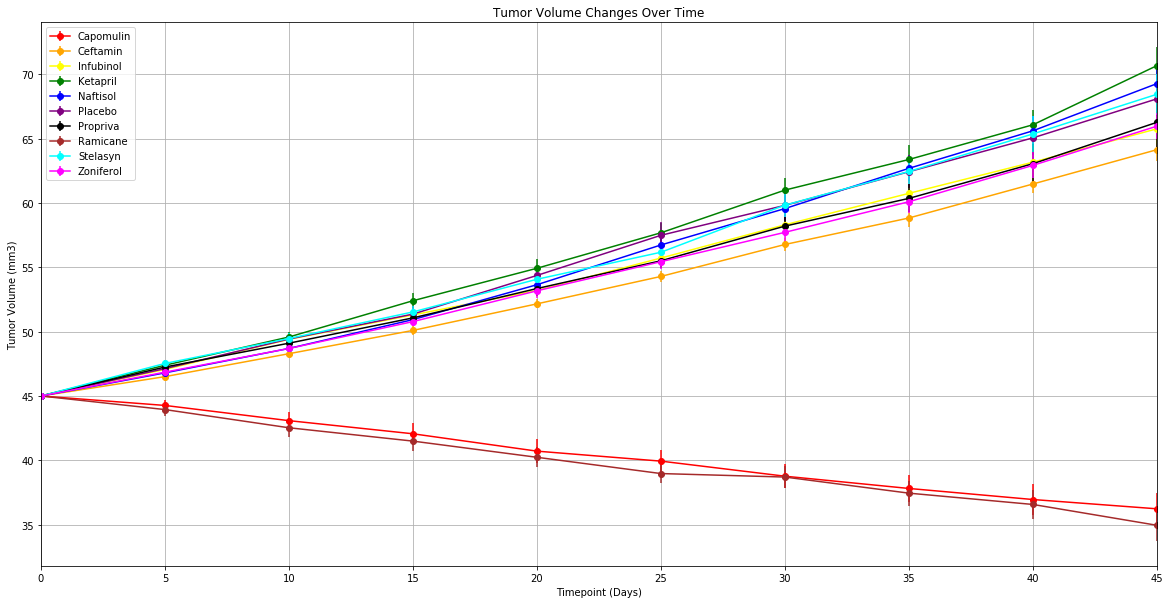

In [32]:
# Generate the Plot (with Error Bars)
keys = tumor_response_table.keys()[1:]
colors = ["orange", "yellow", "green", "blue", "purple", "black", "brown", "cyan", "magenta"]
tumor_response_table_df = tumor_response_table.reset_index()
drug_error = tumor_response_standard_error.loc[tumor_response_standard_error["Drug"] == "Capomulin", "Tumor Volume (mm3)"]
ax = tumor_response_table_df.plot(x="Timepoint", y="Capomulin", yerr=drug_error.tolist(), marker='o', color="red", figsize=(20, 10), label="Capomulin")
for i in range(0, len(keys)):
    drug_error = tumor_response_standard_error.loc[tumor_response_standard_error["Drug"] == keys[i], "Tumor Volume (mm3)"]
    tumor_response_table_df.plot(x="Timepoint", y=keys[i], yerr=drug_error.tolist(), marker='o', color=colors[i], ax=ax, title="Tumor Volume Changes Over Time", label=keys[i])
ax.set_xlabel("Timepoint (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.legend()
ax.grid("on")

# Save the Figure
plt.savefig('../Images/treatment.png')

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [33]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
metastatic_sites_mean = combined_df.loc[:, ["Drug", "Timepoint", "Metastatic Sites"]].groupby(["Drug", "Timepoint"]).mean()

# Preview DataFrame
metastatic_sites_mean

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [34]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
metastatic_sites_standard_error = combined_df.loc[:, ["Drug", "Timepoint", "Metastatic Sites"]].groupby(["Drug", "Timepoint"]).sem()

# Preview DataFrame
metastatic_sites_standard_error

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [35]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_sites_table = pd.pivot_table(metastatic_sites_mean, values="Metastatic Sites", index="Timepoint", columns="Drug", aggfunc=np.mean)

# Preview that Reformatting worked
metastatic_sites_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


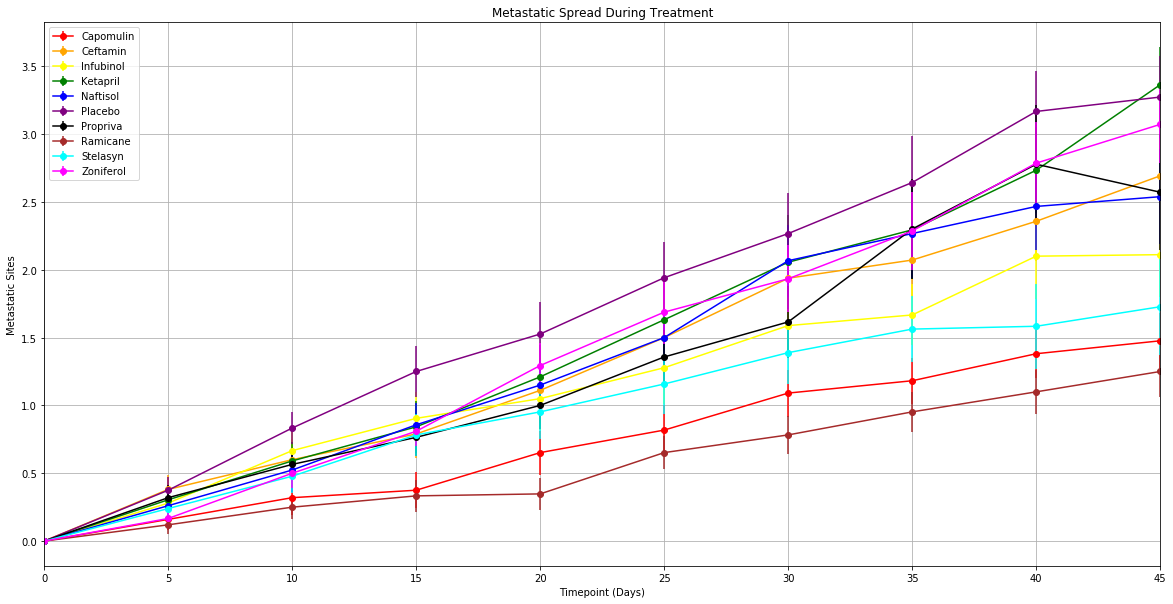

In [37]:
# Generate the Plot (with Error Bars)
keys = metastatic_sites_table.keys()[1:]
colors = ["orange", "yellow", "green", "blue", "purple", "black", "brown", "cyan", "magenta"]
metastatic_sites_table_df = metastatic_sites_table.reset_index()
metastatic_sites_standard_error = metastatic_sites_standard_error.reset_index()
drug_error = metastatic_sites_standard_error.loc[metastatic_sites_standard_error["Drug"] == "Capomulin", "Metastatic Sites"]
ax = metastatic_sites_table_df.plot(x="Timepoint", y="Capomulin", yerr=drug_error.tolist(), marker='o', color="red", figsize=(20, 10), label="Capomulin")
for i in range(0, len(keys)):
    drug_error = metastatic_sites_standard_error.loc[metastatic_sites_standard_error["Drug"] == keys[i], "Metastatic Sites"]
    metastatic_sites_table_df.plot(x="Timepoint", y=keys[i], yerr=drug_error.tolist(), marker='o', color=colors[i], ax=ax, title="Metastatic Spread During Treatment", label=keys[i])
ax.set_xlabel("Timepoint (Days)")
ax.set_ylabel("Metastatic Sites")
ax.legend()
ax.grid("on")

# Save the Figure
plt.savefig('../Images/spread.png')

# Show the Figure
plt.show()


## Survival Rates

In [38]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_of_mice_series = combined_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
count_of_mice = count_of_mice_series.reset_index()

# Preview DataFrame
count_of_mice

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [39]:
# Minor Data Munging to Re-Format the Data Frames
count_of_mice_table = pd.pivot_table(count_of_mice, values="Mouse ID", index="Timepoint", columns="Drug", aggfunc=np.mean)

# Preview the Data Frame
count_of_mice_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


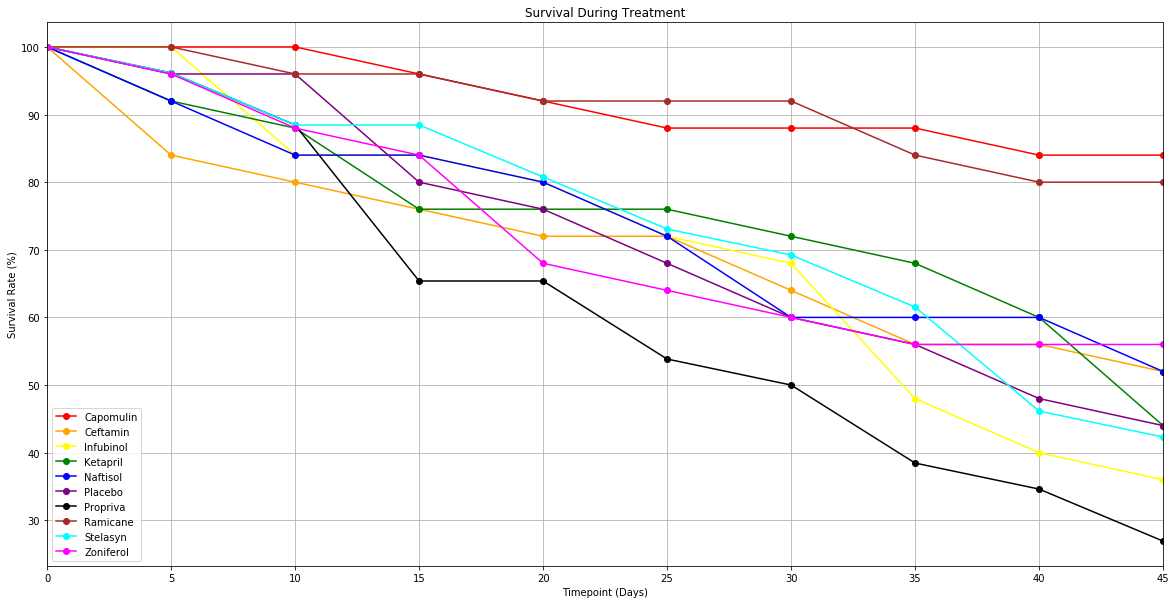

In [49]:
# Generate the Plot (Accounting for percentages)
keys = count_of_mice_table.keys()[1:]
colors = ["orange", "yellow", "green", "blue", "purple", "black", "brown", "cyan", "magenta"]
count_of_mice_table_df = count_of_mice_table.reset_index()
drug_series = count_of_mice_table_df["Capomulin"]
starting_count = drug_series[0]
drug_percent_survival_series = drug_series / starting_count * 100
count_of_mice_table_df["Capomulin"] = drug_percent_survival_series
ax = count_of_mice_table_df.plot(x="Timepoint", y="Capomulin", marker='o', color="red", figsize=(20, 10), label="Capomulin")
for i in range(0, len(keys)):
    drug_series = count_of_mice_table_df[keys[i]]
    starting_count = drug_series[0]
    drug_percent_survival_series = drug_series / starting_count * 100
    count_of_mice_table_df[keys[i]] = drug_percent_survival_series
    count_of_mice_table_df.plot(x="Timepoint", y=keys[i], marker='o', color=colors[i], ax=ax, title="Survival During Treatment", label=keys[i])
ax.set_xlabel("Timepoint (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.legend()
ax.grid("on")

# Save the Figure
plt.savefig("../Images/survival.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [71]:
# Calculate the percent changes for each drug
columns = tumor_response_table.columns
summary_dict = {"Drug": [], "Percent Change": []}
for column in columns:
    drug_series = tumor_response_table[column]
    start = drug_series[0]
    end = drug_series[45]
    percent_change = (end - start) / start * 100
    summary_dict["Drug"].append(column)
    summary_dict["Percent Change"].append(percent_change)
    
summary_df = pd.DataFrame.from_dict(summary_dict).set_index("Drug")

# Display the data to confirm
summary_df

,Percent Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


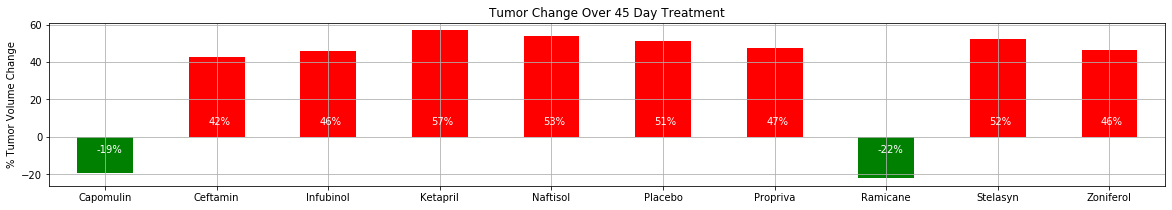

In [137]:
ax = summary_df.plot(kind="bar", figsize=(20,3), title="Tumor Change Over 45 Day Treatment", color=[np.where(summary_df['Percent Change'] < 0, 'g', 'r')], legend=False, rot=0)
ax.grid("on")
ax.set_ylabel("% Tumor Volume Change")
ax.set_xlabel("")
for p in ax.patches:
    if (p.get_height() < 0):
        ax.annotate(f"{str(int(p.get_height()))}%", (p.get_x() + 0.175, -8.5), color="white")
    else:
        ax.annotate(f"{str(int(p.get_height()))}%", (p.get_x() + 0.175, 6.5), color="white")

# Save the Figure
plt.savefig("../Images/change.png")

# Show the Figure
plt.show()